# Workshop 6  - Desarrollo
## Parte 1 - Carga y tratamiento de datos geográficos y estadísticos disponibles
1. Carga de todos los insumos cartográficos disponibles y reproyección a EPSG 9377
2. Carga de los datos de EVAS desde csv
3. Carga de los datos de estaciones IDEAM desde el csv
4. Conversión a información cartográfica de las coordenadas de ubicación del csv de estaciones
5. Establecer sistema coordenado EPSG 4326 para estaciones y reproyectar a EPSG 9377
6. Selección de municipios a partir de su rendimiento para el cultivo de **Palma de Aceite**

In [2]:
#1 Carga de librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path
import pandas as pd
from shapely.geometry import Point

In [41]:
# Carga de archivos csv y shp
archivos_CSV=r"/notebooks/Datos_Geograficos"
SHP=r"/notebooks/Datos_Geograficos/municipios_colombia"

shp_ruta=SHP+r"/municipios_colombia.shp"
muni_shp = gpd.read_file(shp_ruta)
muni_shp = muni_shp.to_crs(9377)


evas_ruta  = archivos_CSV+"/Evaluaciones_Agropecuarias_Municipales_EVA.csv"
evas = pd.read_csv(evas_ruta, encoding='utf-8')

estaciones_csv=archivos_CSV+"/Catalogo_Estaciones_IDEAM.csv"
estaciones = pd.read_csv(estaciones_csv, encoding='utf-8')

print("\nSISTEMA COORDENADO DEL SHP:\n", muni_shp.crs)
print('\n COLUMNAS DE ESTACIONES\n',estaciones.columns.tolist())


SISTEMA COORDENADO DEL SHP:
 EPSG:9377

 COLUMNAS DE ESTACIONES
 ['Codigo', 'Nombre', 'Categoria', 'Estado', 'Departamento', 'Municipio', 'Ubicación', 'Altitud', 'Fecha_instalacion', 'Fecha_suspension', 'Corriente']


In [52]:
# Renombra columnas y lectura de códigos de departamento y municipio - Shape 
muni_shp = muni_shp.rename(columns = {"DPTO_CCDGO":"DPTO_COD","MPIO_CCDGO":"MUN_COD","DPTO_CCDGO":"DPTO_COD","MPIO_CNMBR":"MPIO_NOM"}) # se renombran columnas
muni_shp['MUN_COD'] = muni_shp['MUN_COD'].astype(str).str.zfill(5) # leer columna de codigo municipal como texto y mantener los 5 caracteres siempre
muni_shp['DPTO_COD'] = muni_shp['DPTO_COD'].astype(str).str.zfill(5) # leer columna de codigo departamental como texto y mantener los 5 caracteres siempre
print('\nCOLUMNAS DEL SHAPE RENOMBRADAS\n',muni_shp.columns.tolist())

# Se quitan los duplicados con base en los codigos municipales
#muni_shp = muni_shp.drop_duplicates(subset='MUN_COD')

# Renombra columnas y lectura de códigos de departamento y municipio - csv EVAS 
evas = evas.rename(columns = {"CÓD. \nDEP.":"DPTO_COD","CÓD. MUN.":"MUN_COD","GRUPO \nDE CULTIVO":"GRUPO DE CULTIVO","SUBGRUPO \nDE CULTIVO":"SUBGRUPO DE CULTIVO",\
                       "Área Sembrada\n(ha)":"Área Sembrada (ha)","Área Cosechada\n(ha)":"Área Cosechada (ha)","Producción\n(t)":"Producción (t)",\
                      "Rendimiento\n(t/ha)":"Rendimiento (t/ha)","NOMBRE \nCIENTIFICO":"NOMBRE CIENTIFICO"})
evas['MUN_COD'] = evas ['MUN_COD'].astype(str).str.zfill(5)
evas['DPTO_COD'] = evas ['DPTO_COD'].astype(str).str.zfill(5)
evas["CULTIVO"] = evas["CULTIVO"].astype(str) 
print('\nCOLUMNAS DE EVAS RENOMBRADAS\n',evas.columns.tolist(),'\n')


COLUMNAS DEL SHAPE RENOMBRADAS
 ['DPTO_COD', 'MUN_COD', 'MPIO_NOM', 'MPIO_CDPMP', 'VERSION', 'AREA', 'LATITUD', 'LONGITUD', 'STCTNENCUE', 'STP3_1_SI', 'STP3_2_NO', 'STP3A_RI', 'STP3B_TCN', 'STP4_1_SI', 'STP4_2_NO', 'STP9_1_USO', 'STP9_2_USO', 'STP9_3_USO', 'STP9_4_USO', 'STP9_2_1_M', 'STP9_2_2_M', 'STP9_2_3_M', 'STP9_2_4_M', 'STP9_2_9_M', 'STP9_3_1_N', 'STP9_3_2_N', 'STP9_3_3_N', 'STP9_3_4_N', 'STP9_3_5_N', 'STP9_3_6_N', 'STP9_3_7_N', 'STP9_3_8_N', 'STP9_3_9_N', 'STP9_3_10', 'STP9_3_99', 'STVIVIENDA', 'STP14_1_TI', 'STP14_2_TI', 'STP14_3_TI', 'STP14_4_TI', 'STP14_5_TI', 'STP14_6_TI', 'STP15_1_OC', 'STP15_2_OC', 'STP15_3_OC', 'STP15_4_OC', 'TSP16_HOG', 'STP19_EC_1', 'STP19_ES_2', 'STP19_EE_1', 'STP19_EE_2', 'STP19_EE_3', 'STP19_EE_4', 'STP19_EE_5', 'STP19_EE_6', 'STP19_EE_9', 'STP19_ACU1', 'STP19_ACU2', 'STP19_ALC1', 'STP19_ALC2', 'STP19_GAS1', 'STP19_GAS2', 'STP19_GAS9', 'STP19_REC1', 'STP19_REC2', 'STP19_INT1', 'STP19_INT2', 'STP19_INT9', 'STP27_PERS', 'STPERSON_L', 'STPERSON_S', 'ST

In [37]:
# Obtener las coordenadas de las estaciones y convertir a geometría de punto
estaciones[['lat','lon']] = estaciones['Ubicación'].str.strip("()").str.split(",",expand=True)
estaciones['lat'] = estaciones['lat'].astype(float)
estaciones['lon'] = estaciones['lon'].astype(float)
estaciones["geometry"] = estaciones.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
estaciones = gpd.GeoDataFrame(estaciones, geometry="geometry")
estaciones = estaciones.set_crs('epsg:4326')

# Reproyección de geodataframe de estaciones
estaciones = estaciones.to_crs(epsg=9377)
print("\nSISTEMA COORDENADO DE ESTACIONES:\n", estaciones.crs)
print('\n\nCultivos del país:\n\n',sorted(evas["CULTIVO"].unique()))


SISTEMA COORDENADO DE ESTACIONES:
 EPSG:9377


Cultivos del país:

 ['ACELGA', 'ACHICORIA', 'ACHIOTE', 'ACHIRA', 'AGRAZ', 'AGUACATE', 'AGUAJE', 'AHUYAMA', 'AJI', 'AJO', 'AJONJOLI', 'ALBAHACA', 'ALCACHOFA', 'ALFALFA', 'ALGARROBO', 'ALGODON', 'AMARANTO', 'ANIS', 'ANON', 'ANTURIO', 'APIO', 'ARANDANO', 'ARAZA', 'ARRACACHA', 'ARROZ', 'ARVEJA', 'ASAI', 'ASPARRAGUS', 'ASTROMELIA', 'AVENA', 'BACURI', 'BADEA', 'BANANITO', 'BANANO', 'BATATA', 'BERENJENA', 'BORE', 'BOROJO', 'BREVO', 'BROCOLI', 'CACAO', 'CADUCIFOLIOS', 'CAFE', 'CAIMO', 'CALABACIN', 'CALABAZA', 'CALENDULA', 'CANYARANA', 'CARDAMOMO', 'CAUCHO', 'CAÑA AZUCARERA', 'CAÑA FLECHA', 'CAÑA MIEL', 'CAÑA PANELERA', 'CEBADA', 'CEBOLLA DE BULBO', 'CEBOLLA DE RAMA', 'CEBOLLIN', 'CENTENO', 'CHACHAFRUTO', 'CHAMBA', 'CHAMPIÑON', 'CHIA', 'CHIRIMOYA', 'CHOLUPA', 'CHONQUE', 'CHONTADURO', 'CILANTRO', 'CIMARRON', 'CIRUELA', 'CITRICOS', 'CLAVEL', 'COCCULUS', 'COCO', 'COCONA', 'COL', 'COLIFLOR', 'COPOAZU', 'CORDELINE CINTA', 'COROZO', 'CRISANTEMO', 'CURC

  DPTO_COD MUN_COD   MPIO_NOM MPIO_CDPMP  VERSION          AREA   LATITUD  \
0    00018   00001  FLORENCIA      18001     2018  2.547638e+09  1.749139   
1    00018   00001  FLORENCIA      18001     2018  2.547638e+09  1.749139   
2    00018   00001  FLORENCIA      18001     2018  2.547638e+09  1.749139   
3    00018   00001  FLORENCIA      18001     2018  2.547638e+09  1.749139   
4    00018   00001  FLORENCIA      18001     2018  2.547638e+09  1.749139   

    LONGITUD  STCTNENCUE  STP3_1_SI  ...  \
0 -75.558239     71877.0       32.0  ...   
1 -75.558239     71877.0       32.0  ...   
2 -75.558239     71877.0       32.0  ...   
3 -75.558239     71877.0       32.0  ...   
4 -75.558239     71877.0       32.0  ...   

   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO  PERIODO  \
0                                         ACELGA  2017    2017A   
1                                         ACELGA  2018    2018A   
2                                       AGUACATE  2014     2014   
3   

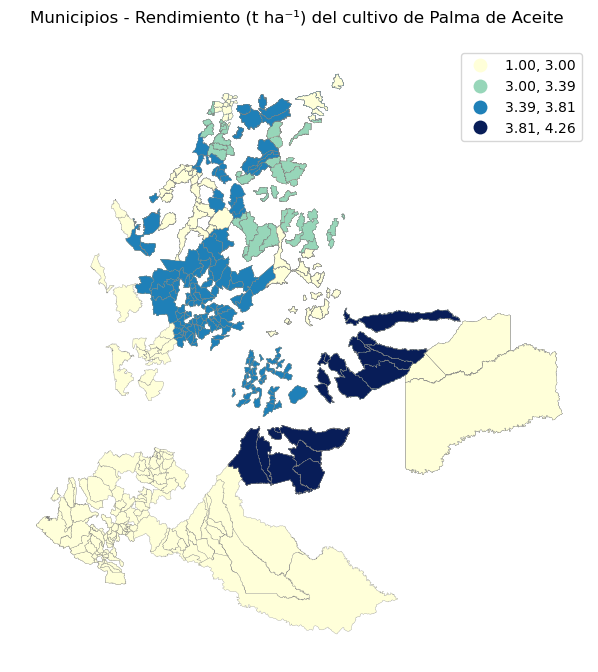

In [55]:
# Merge de los datos de evas y el mapa de municipios del país
#print('Conteo valores muni_shp dptos\n',muni_shp['DPTO_COD'].value_counts())
#print('\nConteo valores evas dptos\n',evas['DPTO_COD'].value_counts())

mun_cultivos = muni_shp.merge(
    evas,
    how='left',
    left_on='DPTO_COD',
    right_on='DPTO_COD',
    validate='many_to_many',
    suffixes=('', '_evas')
)

print(mun_cultivos.head())

# Subset para municipios que reporten cultivo de palma de aceite para el año 2018
año = 2018
cultivo = 'PALMA DE ACEITE'
palma_mun_18 = (
    mun_cultivos.query("CULTIVO == @cultivo and AÑO == @año").copy()
)


ax1 = palma_mun_18.plot(column='Rendimiento (t/ha)',scheme ='Quantiles',k=4,cmap='YlGnBu',legend=True,figsize=(8,8),edgecolor='grey',linewidth=0.2)
ax1.set_title('Municipios - Rendimiento (t ha⁻¹) del cultivo de Palma de Aceite ')
ax1.set_axis_off()
plt.show()

## Parte 2 - Exploración de los datos y selección municipal
1. Seleccionar municipios que estén dentro del 4 y 5 cuartil de rendimiento (t/ha), es decir que tengan rendimientos ≥ 3.39 [t/ha] y ≤ 4.26 [t/ha]
2. Identificar las estaciones del IDEAM dentro de los municpios y fuera con un alcance máximo de 6km
3. Cuantificar tipos de cuerpos de agua por municipio
4. Determinar densidad de vías por municipio (km de vía/area municipal)
5. Selección de municipio con la mayor cantidad de cuerpos de agua de tipo drenaje sencillo o doble y la mayor densidad de vías para transportar insumos y carga

In [ ]:
# Codigo

## Parte 3 - Identificar mejor zona para establecer cultivo
1. Identificar las áreas aptas que están dentro de la Frontera Agrícola
2. Subdivisión por grilla de 1ha
3. Excluir zonas con distancias ≤ 50m a drenajes dobles o sencillos y excluir zonas que contengan otros cuerpos de agua
5. Distancia a las vías de acceso (≤ 1km)
6. Distancia a estaciones del IDEAM (≤ 1km)

In [ ]:
# Codigo